In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
import re
import os
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/Users/alexandrerame/code_repository/dataplace/data/logs_experiments_notebook")
sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")

# sys.path.append("/home/rame/domainbedv2/")
from domainbed.codeplot import plot
plot.plt.style.use('default')
# sys.path.append("/data/rame/logs_experiments_notebook/nlp")
from matplotlib import rc

rc('text', usetex=True)
plot.plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
plot.plt.rcParams['text.usetex'] = True
plot.plt.rcParams['font.family'] = 'serif'


In [2]:
dict_key_to_minmax_fts_val = {
    'ROUGE_L': [0.5994, 0.6059, 0.00649999999999995],
    'Bleu_1': [0.7838, 0.8321, 0.0482999999999999],
}


In [3]:
dict_key_to_minmax_fts_test = dict_key_to_minmax_fts_val
# {
#     'ROUGE_L': [0.6013, 0.6034, 0.6034 - 0.6013],
#     'Bleu_1': [0.8182, 0.8271, 0.8271 - 0.8182],
# }


In [4]:
import data_captioning_test# as data_captioning_val
import data_captioning_val# as data_captioning_test

In [5]:
print(len(data_captioning_val.l_wa))
print(len(data_captioning_val.l_multi))
print(len(data_captioning_test.l_multi))
print(len(data_captioning_test.l_wa))

11
11
11
11


In [6]:
hatmus = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]


def normalize_val(l, key):
    return (l[key] - dict_key_to_minmax_fts_val[key][0]) / dict_key_to_minmax_fts_val[key][2]


def normalize_test(l, key):
    return (l[key] - dict_key_to_minmax_fts_test[key][0]) / dict_key_to_minmax_fts_test[key][2]


In [7]:
ltest_multi_hatmu = {
    hatmu: [
        hatmu * normalize_test(l, "ROUGE_L") + (1 - hatmu) * normalize_test(l, "Bleu_1")
        for l in data_captioning_test.l_multi
    ] for hatmu in hatmus
}

In [8]:
ltest_wa_hatmu = {
    hatmu: [
        hatmu * normalize_test(l, "ROUGE_L") + (1 - hatmu) * normalize_test(l, "Bleu_1")
        for l in data_captioning_test.l_wa
    ] for hatmu in hatmus
}

In [9]:
dict_colormaps = plot.create_colormaps()
cmap_redpurpleblue = plot.matplotlib.colors.LinearSegmentedColormap.from_list(
    "", [
        plot.get_color_from_cmap("Reds", dict_colormaps),
        plot.get_color_from_cmap("Purples", dict_colormaps),
        plot.get_color_from_cmap("Blues", dict_colormaps)
    ]
)

In [10]:
l_bleurouge_hatmus = [
    [
        {
            "hatmu": hatmu,
            "bleurougehatmu":
            hatmu * normalize_val(l, "ROUGE_L") + (1 - hatmu) * normalize_val(l, "Bleu_1")
        } for hatmu in hatmus
    ] for l in data_captioning_val.l_multi
]
labels_bleurouge_hatmus = [
    # r"$\mu$=" +
    str(l["lambda"]) for l in data_captioning_val.l_multi
]

l_bleurouge_hatmus.append(
    [
        {
            "hatmu": hatmu,
            "bleurougehatmu": l_bleurouge_hatmus[int(10 * hatmu)][int(10 * hatmu)]["bleurougehatmu"]
        } for hatmu in hatmus
    ]
)
l_bleurouge_hatmus.append(
    [
        {
            "hatmu":
            hatmu,
            "bleurougehatmu":
            # max(
            #     [
            #         l_bleurouge_hatmus[i][int(10 * hatmu)]["bleurougehatmu"]
            #         for i in range(len(l_bleurouge_hatmus))
            #     ]
            # )
            l_bleurouge_hatmus[int(
                10 * data_captioning_test.l_multi[np.argmax(ltest_multi_hatmu[hatmu])]["lambda"]
            )][int(10 * hatmu)]["bleurougehatmu"]
        } for hatmu in hatmus
    ]
)
labels_bleurouge_hatmus.append(r"$\hat{\mu}$")
labels_bleurouge_hatmus.append(r"CV $\mu$")


In [11]:
l_wableurouge_hatmus = [
    [
        {
            "hatmu": hatmu,
            "bleurougehatmu":
            hatmu * normalize_val(l, "ROUGE_L") + (1 - hatmu) * normalize_val(l, "Bleu_1")
        } for hatmu in hatmus
    ] for i, l in enumerate(data_captioning_val.l_wa)
]


l_wableurouge_hatmus.append(
    [
        {
            "hatmu": hatmu,
            "bleurougehatmu":
            l_wableurouge_hatmus[int(10 * hatmu)][int(10 * hatmu)]["bleurougehatmu"]
        } for hatmu in hatmus
    ]
)

l_wableurouge_hatmus.append(
    [
        {
            "hatmu":
            hatmu,
            "bleurougehatmu":
            # max(
            #     [
            #         l_wableurouge_hatmus[i][int(10 * hatmu)]["bleurougehatmu"]
            #         for i in range(len(l_wableurouge_hatmus))
            #     ]
            # )
            l_wableurouge_hatmus[
                int(10 * data_captioning_test.l_multi[np.argmax(ltest_wa_hatmu[hatmu])]["lambda"])]
            [int(10 * hatmu)]["bleurougehatmu"]
        } for hatmu in hatmus
    ]
)
labels_wableurouge_hatmus = [
    # r"$\lambda$=" +
    str(l["lambda"]) for i, l in enumerate(data_captioning_val.l_wa)
]
labels_wableurouge_hatmus.append(r"$\hat{\mu}$")
labels_wableurouge_hatmus.append(r"CV $\lambda$")
clean_kwargs_hatmu = {
    "loc": "lower right",
    "order": "onlyconnect",
    "title": None,
    "_dict_key_to_label": {
        "1-lambda": r'$\lambda$',
        "bleurougehatmu": r"$(1-\hat{\mu})\times BLEU1_{Norm} + \hat{\mu}\times ROUGE_{Norm}$",
        "lambda": r'$\lambda$',
        "METEOR": "METEOR",
        "CIDEr": "CIDEr",
        "hatmu": r"$\hat{\mu}$"
    }
}
len_labels = len(labels_wableurouge_hatmus) - 2
colors_hatmu = [
    plot.cm.get_cmap(cmap_redpurpleblue)((len_labels - 1 - i) / (len_labels - 1))
    for i in range(len_labels)
]

In [15]:
def plot_multiple_l(
    ls,
    key_x,
    key_y,
    order=1,
    labels=None,
    colors=None,
    linestyles=None,
    linewidths=None,
    _dict_key_to_label="def",
    loc="upper right",
    legendtitles=None,
    title=None,
    fig=None,
    fontsize=None,
    kwargs={}
):
    if fig is None:
        fig, ax1 = plot.plt.subplots()
    else:
        ax1 = plot.plt.gca()
    plot.plt.xlabel(_dict_key_to_label.get(key_x, key_x), fontsize=plot.SIZE_AXIS)
    plot.plt.ylabel(_dict_key_to_label.get(key_y, key_y), fontsize=plot.SIZE_AXIS)

    def plot_with_int(ll, color, colormap, label, marker, linestyle, linewidth, key_y, ax, kwargs):
        t = plot.get_x(ll, key_x)
        if t == []:
            return
        plot.interpolate_points(
            plot.get_x(ll, key_x),
            plot.get_x(ll, key_y),
            order=order,
            ax=ax,
            label=label,
            color=color,
            marker=marker,
            linewidth=linewidth,
            linestyle=linestyle,
            kwargs=kwargs
        )
        kwargs["color"] = color

        if order not in ["onlyfit1", "onlyconnect"]:
            ax.scatter(
                plot.get_x(ll, key_x),
                plot.get_x(ll, key_y),
                label=None if order != "nofit" else label,
                marker=marker,
                **kwargs
            )

    for i, l in enumerate(ls):
        ilinestyle = linestyles[i]
        ilinewidth = linewidths[i]
        for index in range(len(l)):
            label = labels[i][index]
            kwargs_copy = {k: v for k, v in kwargs.items()}
            if index == (len(l) - 2):
                linewidth = 4
                linestyle = "dashed"
            elif index == (len(l) - 1):
                linewidth = 4
                linestyle = "solid"
            else:
                linewidth = ilinewidth
                linestyle = ilinestyle
            plot_with_int(
                l[index],
                color=colors[i][index],
                colormap=None,
                label=label,
                marker=None,
                linewidth=linewidth,
                linestyle=linestyle,
                key_y=key_y,
                ax=ax1,
                kwargs=kwargs_copy
            )

    if loc != "no":
        fontsize = fontsize or plot.SIZE
        # Get the handles and labels from the legend
        ax1.legend(
            loc='lower right',
            # bbox_to_anchor=(0, 1.02, 1, 0.2),
            ncol=2,
            fontsize=fontsize,
            handlelength=2,
            title=legendtitles[0],
            labelspacing=0.1,
        )
    if title:
        ax1.title(title, fontsize="x-large")
    return fig

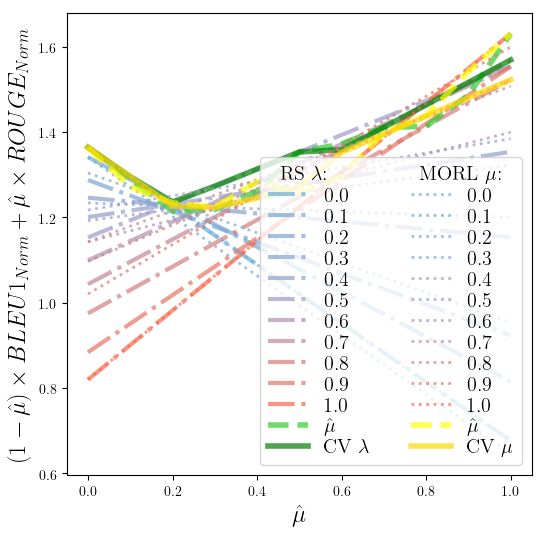

In [20]:


plot.plt.rcParams['legend.title_fontsize'] = 'x-large'
def plot_hatmu_captioning(legendtitles=None, **kwargs):

    plot.plt.rcParams["figure.figsize"] = (6, 6)

    for key in clean_kwargs_hatmu.keys():
        if key not in kwargs:
            kwargs[key] = clean_kwargs_hatmu[key]
    fig_dr = plot_multiple_l(
        ls=[l_wableurouge_hatmus, l_bleurouge_hatmus],
        labels=[labels_wableurouge_hatmus, labels_bleurouge_hatmus],
        key_x="hatmu",
        key_y="bleurougehatmu",
        linestyles=["dashdot", "dotted"],
        colors=[colors_hatmu + ["limegreen", "green"], colors_hatmu + ["yellow", "gold"]],
        legendtitles=legendtitles,
        linewidths=[3, 2],
        fontsize="x-large",
        kwargs={"alpha": 0.7},
        **kwargs
    )
    plot.plt.rcParams["figure.figsize"] = (6, 6)
    return fig_dr


fig_dr = plot_hatmu_captioning(
    legendtitles=[r"RS $\lambda$:" + "\ \ \ \ \ \ \ \ \ \ \ \ \ \ " + r"MORL $\mu$:\ \ \ \ "]
)
plot.save_fig(
    fig=fig_dr, name="captioning/paretohatmu_captioning_bleu1torouge.pdf", do_save=True
)
